Correlation Between Review summary and number of positive users: Is there a significant correlation between the percentage of positive reviews and the overall review summary for a game? Visualize this relationship and determine its strength.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/divjot21/final_0_80509.csv")
data

/var/folders/c8/ff8ywsc54fb_wcq687c2hbk40000gn/T/ipykernel_5563/654260392.py:1: DtypeWarning: Columns (10,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/divjot21/final_0_80509.csv")


,Index,AppID,Title,Initial_Price,Final_Price,Discount_Percent,Developers,Publishers,Genres,Categories,...,Subtitle_Languages,Positive_Reviews,Negative_Reviews,Total_Reviews,Overall_Review_Summary,Recent_Reviews,Recent_Review_Summary,Mature_Content_Desc,Awards,Curators
0,0,20200,Galactic Bowling,NaN,NaN,NaN,['Perpetual FX Creative'],['Perpetual FX Creative'],"['Casual', 'Indie', 'Sports']","['Single-player', 'Multi-player', 'Steam Achie...",...,['English'],6,11,12,Mostly Negative,NaN,NaN,NaN,NaN,6.0
1,1,655370,Train Bandit,52.0,52.0,0.0,['Rusty Moyher'],['Wild Rooster'],"['Action', 'Indie']","['Single-player', 'Steam Achievements', 'Full ...",...,"['English', 'French', 'Italian', 'German', 'Sp...",57,7,53,Very Positive,NaN,NaN,NaN,NaN,8.0
2,2,1732930,Jolt Project,199.0,199.0,0.0,['Campião Games'],['Campião Games'],"['Action', 'Adventure', 'Indie', 'Strategy']",['Single-player'],...,['English'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,3,1355720,Henosis™,NaN,NaN,NaN,['Odd Critter Games'],['Odd Critter Games'],"['Adventure', 'Casual', 'Indie']","['Single-player', 'Full controller support']",...,['English'],5,0,5,5 user reviews,NaN,NaN,NaN,NaN,5.0
4,4,1139950,Two Weeks in Painland,0.0,0.0,0.0,['Unusual Games'],['Unusual Games'],"['Adventure', 'Indie']","['Single-player', 'Steam Achievements']",...,"['English', 'Spanish - Spain']",53,6,59,Very Positive,NaN,NaN,This Game may contain content not appropriate ...,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80505,80505,574674,VRC PRO Deluxe Off-road tracks 4,570.0,285.0,50.0,['Virtual Racing Industries Ltd.'],['Virtual Racing Industries Ltd.'],"['Action', 'Casual', 'Indie', 'Racing', 'Simul...","['Single-player', 'Multi-player', 'Downloadabl...",...,['English'],0,1,1,1 user reviews,NaN,NaN,NaN,NaN,NaN
80506,80506,947930,Car Mechanic Simulator 2018 - Porsche DLC,300.0,36.0,88.0,['Red Dot Games'],['PlayWay S.A.'],"['Racing', 'Simulation']","['Single-player', 'Downloadable Content', 'Ste...",...,"['English', 'French', 'Italian', 'German', 'Sp...",67,7,70,Very Positive,NaN,NaN,NaN,NaN,1.0
80507,80507,1900780,Erannorth Chronicles - Ancient Ruins,450.0,360.0,20.0,['Spyridon Thalassinos'],['Spyridon Thalassinos'],"['Adventure', 'Indie', 'RPG', 'Strategy']","['Single-player', 'Downloadable Content', 'Ste...",...,['English'],10,0,10,Positive,NaN,NaN,NaN,NaN,NaN
80508,80508,2470521,Crossout — Electric beetle (Lite edition),1199.0,1199.0,0.0,['Targem Games'],['Gaijin Distribution KFT'],"['Action', 'Free to Play', 'Massively Multipla...","['Multi-player', 'MMO', 'PvP', 'Online PvP', '...",...,['English'],3,19,21,Negative,NaN,NaN,NaN,NaN,NaN


In [3]:
x = data['Overall_Review_Summary'].unique()
x

array(['Mostly Negative', 'Very Positive', nan, '5 user reviews', 'Mixed',
       '1 user reviews', 'Mostly Positive', '6 user reviews', 'Positive',
       '3 user reviews', '8 user reviews', 'No user reviews',
       '4 user reviews', 'Negative', 'Overwhelmingly Positive',
       '2 user reviews', '9 user reviews', '7 user reviews',
       'Overwhelmingly Negative', 'Very Negative'], dtype=object)

Now, we'll convert this categorical data into dummy variables which will help us fit the linear regression.

In [4]:
type(x)

#'Overwhelmingly Negative' = 0
#'Very Negative' = 1
#'Mostly Negative' = 2
#'Negative' = 3
#'Mixed' = 4
#'Positive' = 5
#'Mostly Positive' = 6
#'Very Positive' = 7
#'Overwhelmingly Positive' = 8

value_mapping = {
    'Overwhelmingly Negative': 0,
    'Very Negative': 1,
    'Mostly Negative': 2,
    'Negative': 3,
    'Mixed': 4,
    'Positive': 5,
    'Mostly Positive': 6,
    'Very Positive': 7,
    'Overwhelmingly Positive': 8
}

In [5]:
y = data[['Overall_Review_Summary' , 'Positive_Reviews', 'Negative_Reviews']]
y.dropna(inplace=True)
y

/var/folders/c8/ff8ywsc54fb_wcq687c2hbk40000gn/T/ipykernel_5563/1551521365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.dropna(inplace=True)


,Overall_Review_Summary,Positive_Reviews,Negative_Reviews
0,Mostly Negative,6,11
1,Very Positive,57,7
3,5 user reviews,5,0
4,Very Positive,53,6
5,Mixed,133,69
...,...,...,...
80505,1 user reviews,0,1
80506,Very Positive,67,7
80507,Positive,10,0
80508,Negative,3,19


In [6]:
list1 = ['5 user reviews','1 user reviews','6 user reviews','3 user reviews','8 user reviews','No user reviews','4 user reviews','2 user reviews','9 user reviews', '7 user reviews']
y1 = y[y.Overall_Review_Summary.isin(list1) == False]
y1 #Finally cleaned data

,Overall_Review_Summary,Positive_Reviews,Negative_Reviews
0,Mostly Negative,6,11
1,Very Positive,57,7
4,Very Positive,53,6
5,Mixed,133,69
6,Mixed,22,9
...,...,...,...
80504,Mostly Negative,5,8
80506,Very Positive,67,7
80507,Positive,10,0
80508,Negative,3,19


In [7]:
y1['Overall_Review_Summary'] = y1['Overall_Review_Summary'].map(value_mapping)
y1

/var/folders/c8/ff8ywsc54fb_wcq687c2hbk40000gn/T/ipykernel_5563/2516405102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y1['Overall_Review_Summary'] = y1['Overall_Review_Summary'].map(value_mapping)


,Overall_Review_Summary,Positive_Reviews,Negative_Reviews
0,2,6,11
1,7,57,7
4,7,53,6
5,4,133,69
6,4,22,9
...,...,...,...
80504,2,5,8
80506,7,67,7
80507,5,10,0
80508,3,3,19


Converting Postive_Reviews and Negative_Reviews to numbers from string notation:

In [8]:
y1['Positive_Reviews'] = y1['Positive_Reviews'].str.replace(',', '', regex=True)
y1['Positive_Reviews'] = y1['Positive_Reviews'].str.replace('\.', '', regex=True)
y1['Positive_Reviews'] = y1['Positive_Reviews'].astype(int)

y1['Negative_Reviews'] = y1['Negative_Reviews'].str.replace(',', '', regex=True)
y1['Negative_Reviews'] = y1['Negative_Reviews'].str.replace('\.', '', regex=True)
y1['Negative_Reviews'] = y1['Negative_Reviews'].astype(int)

y1

/var/folders/c8/ff8ywsc54fb_wcq687c2hbk40000gn/T/ipykernel_5563/1565621983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y1['Positive_Reviews'] = y1['Positive_Reviews'].str.replace(',', '', regex=True)
/var/folders/c8/ff8ywsc54fb_wcq687c2hbk40000gn/T/ipykernel_5563/1565621983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y1['Positive_Reviews'] = y1['Positive_Reviews'].str.replace('\.', '', regex=True)
/var/folders/c8/ff8ywsc54fb_wcq687c2hbk40000gn/T/ipykernel_5563/1565621983.py:3: SettingWithCop

,Overall_Review_Summary,Positive_Reviews,Negative_Reviews
0,2,6,11
1,7,57,7
4,7,53,6
5,4,133,69
6,4,22,9
...,...,...,...
80504,2,5,8
80506,7,67,7
80507,5,10,0
80508,3,3,19


In [9]:
y1['Percentage_Positive'] = y1['Positive_Reviews']/(y1['Positive_Reviews'] + y1['Negative_Reviews'])*100
y1

/var/folders/c8/ff8ywsc54fb_wcq687c2hbk40000gn/T/ipykernel_5563/581552298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y1['Percentage_Positive'] = y1['Positive_Reviews']/(y1['Positive_Reviews'] + y1['Negative_Reviews'])*100


,Overall_Review_Summary,Positive_Reviews,Negative_Reviews,Percentage_Positive
0,2,6,11,35.294118
1,7,57,7,89.062500
4,7,53,6,89.830508
5,4,133,69,65.841584
6,4,22,9,70.967742
...,...,...,...,...
80504,2,5,8,38.461538
80506,7,67,7,90.540541
80507,5,10,0,100.000000
80508,3,3,19,13.636364


In [10]:
correlation = y1['Overall_Review_Summary'].corr(y1['Percentage_Positive'])
correlation

0.7281095106170183

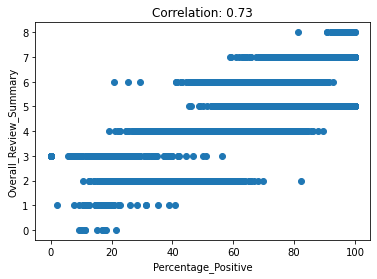

In [11]:
y2 = y1['Overall_Review_Summary']
x2 = y1['Percentage_Positive']

plt.scatter(x2,y2)
plt.title(f'Correlation: {correlation:.2f}')
plt.xlabel('Percentage_Positive')
plt.ylabel('Overall_Review_Summary')
plt.show()

A correlation of 0.7281095106170196 between 'Overall_Review_Score' and 'Percentage_Positive' suggests a relatively strong positive linear relationship between these two variables in the dataset. The positive correlation coefficient (0.728) indicates that as 'Overall_Review_Score' increases, 'Percentage_Positive' tends to increase as well. In other words, there is a tendency for products or items with higher overall review scores to also have a higher positive review percentage.